In [118]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm

Part 1(a)

<IPython.core.display.Javascript object>


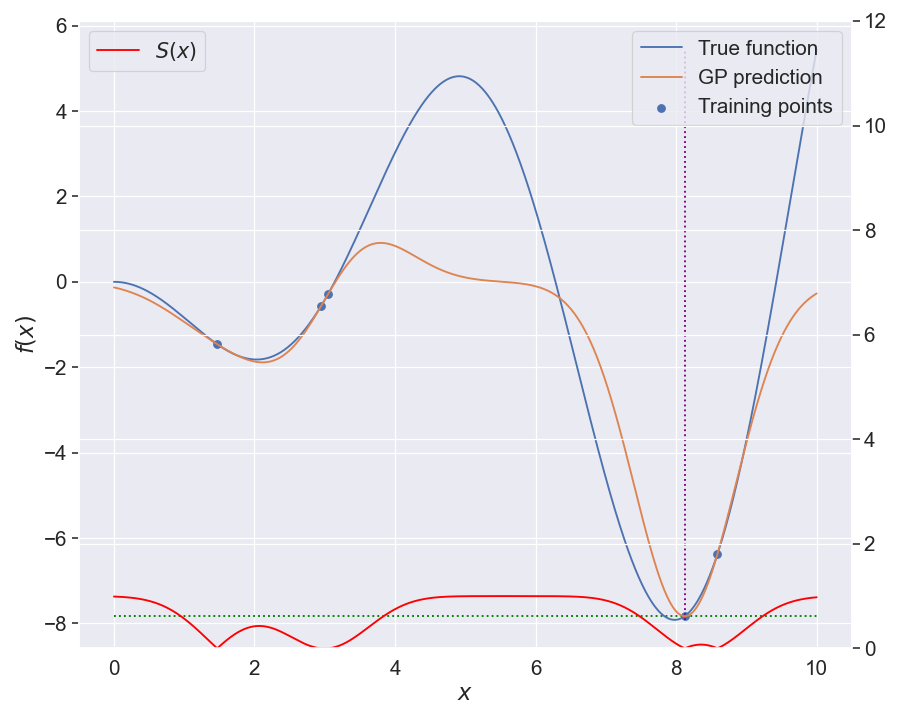

In [119]:
## function for problem 10 function
def fProblem10(x):
    val=-(x*math.sin(x))
    return val
## function for problem 21 functio
def fProblem21(x):
    val=-(x*math.sin(x)+x*math.cos(2*x))
    return val
## function to generate x_train,y_train using probelm 10 function
def initial_sample(n_init,x_low,x_high):
    x_0=random.uniform(x_low,x_high)
    y_0=fProblem10(x_0)
   
    x_train=np.array([[x_0]])
    y_train=np.array([[y_0]])
   
    i=1
    while i<n_init:
        x_i=random.uniform(x_low,x_high)
        y_i=fProblem10(x_i)
       
        x_train=np.vstack((x_train,x_i))
        y_train=np.vstack((y_train,y_i))
       
        i=i+1
    return x_train,y_train

## function to generate x_train,y_train using probelm 21 function
def initial_sample2(n_init,x_low,x_high):
    x_0=random.uniform(x_low,x_high)
    y_0=fProblem21(x_0)
   
    x_train=np.array([[x_0]])
    y_train=np.array([[y_0]])
   
    i=1
    while i<n_init:
        x_i=random.uniform(x_low,x_high)
        y_i=fProblem21(x_i)
       
        x_train=np.vstack((x_train,x_i))
        y_train=np.vstack((y_train,y_i))
       
        i=i+1
    return x_train,y_train
##GP model creation
def train_gaussian_process(x_train,y_train):
    kernel=RBF()
    gpr=GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=5,normalize_y=False)
    gpr.fit(x_train,y_train)
    return gpr

## POI implementation 
def probability_of_improvement(y_pred,std_dev,f_min):    
    POI=norm.cdf(f_min-y_pred/std_dev)
    return POI

## custom function to find initial 5 points 
def minimumvalue_fn(y_pred,std_dev,f_min):    
    minvfn=norm.entropy(f_min-y_pred/std_dev)
    return minvfn

test_f=np.vectorize(fProblem10)
x_plot=np.linspace(0,10,1000)
y_plot=test_f(x_plot)

n_init=5
x_low=0
x_high=10
##True function
x_train,y_train=initial_sample(n_init,x_low,x_high)       
gpr=train_gaussian_process(x_train,y_train)
##GP prediction,standard deviation
y_gpr,y_std=gpr.predict(x_plot.reshape(-1,1),return_std=True,return_cov=False)
fig,ax1=plt.subplots(figsize = (10,8))
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
##Marking minimum point obtained
ax1.vlines(x_plot[y_gpr.argmin()],min(y_plot),max(y_plot),linestyles ="dotted",color="purple")
ax1.hlines(min(y_gpr),min(x_plot),max(x_plot),linestyles ="dotted",color="green")
ax1.plot(x_plot,y_plot,label="True function")
ax1.plot(x_plot,y_gpr,label="GP prediction")
ax1.scatter(x_train,y_train,label="Training points")
ax1.tick_params(axis="y")
ax2=ax1.twinx()
ax2.plot(x_plot,y_std,label="$S(x)$",color="red")
ax2.tick_params(axis="y")
ax2.set_ylim([0,12])
fig.tight_layout()
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
plt.show()


Part 1(b)

<IPython.core.display.Javascript object>


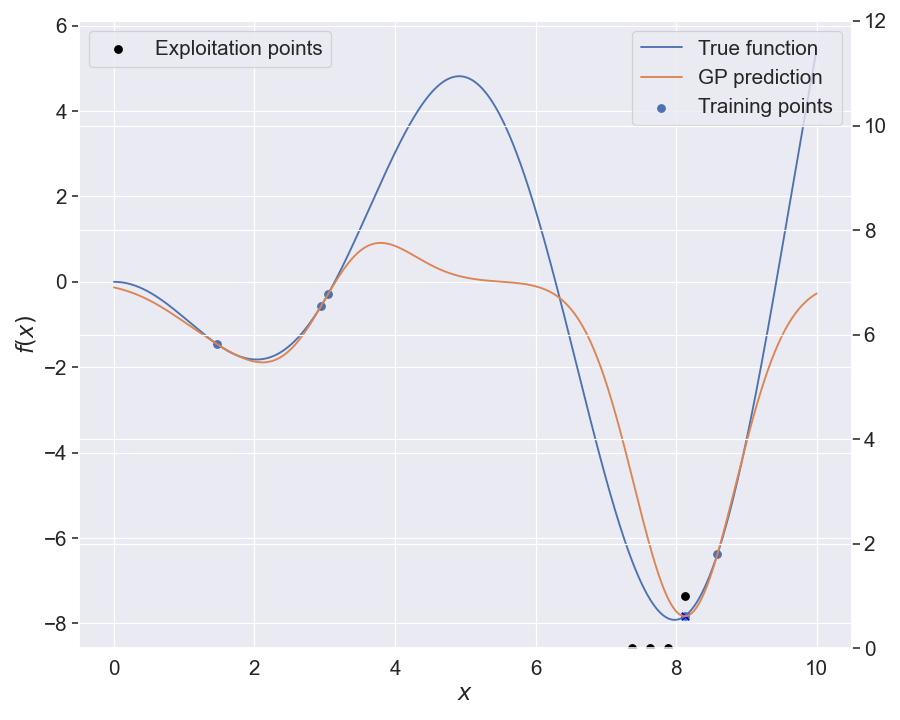

In [120]:
f_min = min(y_train)
y_gpr_xploits=[]
x_xploits=[]
POIarray=[]
f_minarray=[]
POI=None
f_minXploit=None

def probability_of_improvement(y_pred,std_dev,f_min):    
    POI=norm.cdf(f_min-y_pred/std_dev)
    return POI

                    
gpr=train_gaussian_process(x_train,y_train)
y_gpr,y_std=gpr.predict(x_plot.reshape(-1,1),return_std=True,return_cov=False)

##Exploitation points plotted using small deviations from T(f_min). A step-length of 0.25 is taken inorder to exploit around the 
## minimum of y points. As it becomes unreasonably smaller it shifts away from the area of exploitation and renders itself useless
for i in np.arange(0,1,0.25):
        f_minXploit=(f_min-i)
        POI=probability_of_improvement((min(y_gpr)-i),min(y_std)-i,f_minXploit)         
        POIarray.append(POI)
        f_minarray.append(f_minXploit)
        x_xploits.append(x_plot[y_gpr.argmin()]-i)

fig,ax1=plt.subplots(figsize = (10,8))
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")

ax1.plot(x_plot,y_plot,label="True function")
ax1.plot(x_plot,y_gpr,label="GP prediction")
ax1.scatter(x_train,y_train,label="Training points")

ax1.tick_params(axis="y")
## Plotting the minimum point obtained from gaussian process prediction 
ax1.scatter(x_plot[y_gpr.argmin()],min(y_gpr),marker="x",color="blue")
ax2=ax1.twinx()
ax2.scatter(x_xploits,POIarray,label="Exploitation points",color="black")

ax2.tick_params(axis="y")
ax2.set_ylim([0,12])
fig.tight_layout()
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
plt.show()

Part 1(c)

In [121]:
x_train_2=[]
y_train_2=[]
def BayesianOptimization():
        iter_max = 10
        iteration = 6
        x_train_2, y_train_2 = initial_sample2(n_init,x_low,x_high)
        y_best_2 = min(y_train)
        while iteration < iter_max:
             gp = train_gaussian_process(x_train_2,y_train_2)
         
        #      x_next = maximize_acquisition_function(gp,x_train,y_train,y_best,x_low,x_high)
             x_next_2 = minimize_acquisition_function(gp,x_train_2,y_train_2,y_best_2,x_low,x_high)
#              print(x_next)
             y_next_2 = evaluate_x_next21(x_next_2)
#              print(y_next)
             if y_next_2 < y_best_2:
                     y_best_2 = y_next_2
                     x_best_2 = x_next_2
         
             x_train_2=np.vstack((x_train_2,x_next_2))
             y_train_2=np.vstack((y_train_2,y_next_2))
             iteration = iteration + 1
#              print(iteration,x_next_2,y_next_2)
         
# print("Best point found: ",x_best,y_best)
        return(x_train_2,y_train_2)

def minimize_acquisition_function(gpr,x_train,y_train,f_min,x_low,x_high):
    n_grid_points=1000
    x_grid=np.linspace(x_low,x_high,n_grid_points)
    POI_min=f_min
    x_next=x_grid[0]
    for x_val in x_grid:        
        y_gpr_mnfn,y_std_mnfn=gpr.predict(x_val.reshape(-1,1),return_std=True,return_cov=False)
        POI_val=minimumvalue_fn(y_gpr_mnfn[0][0],y_std_mnfn[0],POI_min)       
#         POI_val=setRandomvalueForT()
        if POI_val<POI_min:            
            POI_min=POI_val           
            x_next=x_val  
        if x_next==0:
            POI_min=POI_val           
            x_next=x_val
            
    return x_next

def evaluate_x_next21(x_next):
         y_next = fProblem21(x_next)
         return y_next

<IPython.core.display.Javascript object>


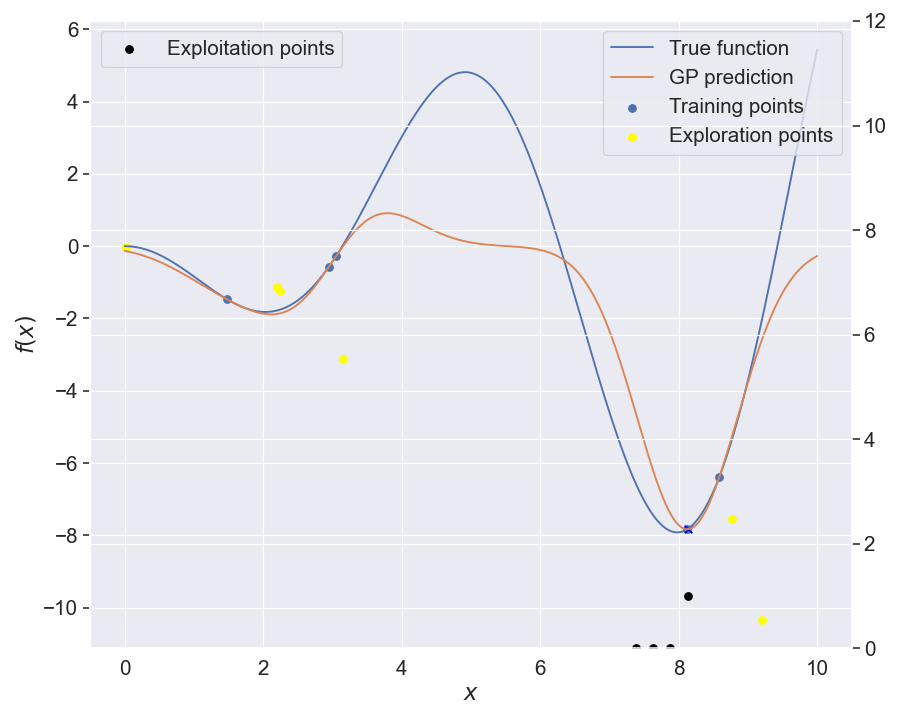

In [122]:
f_min = min(y_train)
y_gpr_xploits=[]
x_xploits=[]
POIarray=[]
f_minarray=[]
POI=None
f_minXploit=None

def probability_of_improvement(y_pred,std_dev,f_min):    
    POI=norm.cdf(f_min-y_pred/std_dev)
    return POI

                    
gpr=train_gaussian_process(x_train,y_train)
y_gpr,y_std=gpr.predict(x_plot.reshape(-1,1),return_std=True,return_cov=False)

##Exploitation points plotted using small deviations from T(f_min). A step-length of 0.25 is taken inorder to exploit around the 
## minimum of y points. As it becomes unreasonably smaller it shifts away from the area of exploitation and renders itself useless
for i in np.arange(0,1,0.25):
        f_minXploit=(f_min-i)
        POI=probability_of_improvement((min(y_gpr)-i),min(y_std)-i,f_minXploit)         
        POIarray.append(POI)
        f_minarray.append(f_minXploit)
        x_xploits.append(x_plot[y_gpr.argmin()]-i)
x_t_2,y_t_2=BayesianOptimization()
fig,ax1=plt.subplots(figsize = (10,8))
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")

ax1.plot(x_plot,y_plot,label="True function")
ax1.plot(x_plot,y_gpr,label="GP prediction")
ax1.scatter(x_train,y_train,label="Training points")

ax1.tick_params(axis="y")
## Plotting the minimum point obtained from gaussian process prediction 
ax1.scatter(x_plot[y_gpr.argmin()],min(y_gpr),marker="x",color="blue")
ax2=ax1.twinx()
ax2.scatter(x_xploits,POIarray,label="Exploitation points",color="black")
ax1.scatter(x_t_2,y_t_2,color="yellow",label="Exploration points")

ax2.tick_params(axis="y")
ax2.set_ylim([0,12])
fig.tight_layout()
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
plt.show()

Part 2 Supervised Learning

Pre-processing

In this phase you will be focussing on preparing the dataset, i.e. loading, exploring dataset, displaying, removing noise and normalisation etc. Then, split the data for training and the remainder for test. Take appropriate measures to ensure that the test set is not biased in any way. Collect and record statistics on the resulting training and test sets

In [123]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
def ConvertTodf(data):
    data_df=pd.DataFrame(data)
    return data_df
def DrawBoxplot(df):
    sns.boxplot(data= pd.DataFrame(df))
    return plt.show()

Patient_Gene_df=pd.read_csv("cw2/CW2_dataset.csv")
Patient_Gene_df
Patient_Cancer_df=pd.read_csv('cw2/CW2_dataset_PatientID_labels.csv')
## Dropping description gene description column as we can work with gene accession number
Patient_Gene_col_dropped=Patient_Gene_df.drop(['Gene Description'],axis=1) 
## Providing patient column header before transposing the dataframe
Patient_Gene_col_dropped.rename(columns={'Gene Accession Number':'patient'}, inplace=True)
Patient_Cancer_df.set_index('patient',inplace=True)
Patient_Gene_col_dropped.set_index('patient',inplace=True)
#Transposing the data inorder to better suit for our model
Patient_Gene_df_T=Patient_Gene_col_dropped.T
Patient_Gene_df_T


patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214.0,-153.0,-58.0,88.0,-295.0,-558.0,199.0,-176.0,252.0,206.0,...,185.0,511.0,-125.0,389.0,-37.0,793.0,329.0,36.0,191.0,-37.0
2,-139.0,-73.0,-1.0,283.0,-264.0,-400.0,-330.0,-168.0,101.0,74.0,...,169.0,837.0,-36.0,442.0,-17.0,782.0,295.0,11.0,76.0,-14.0
3,-76.0,-49.0,-307.0,309.0,-376.0,-650.0,33.0,-367.0,206.0,-215.0,...,315.0,1199.0,33.0,168.0,52.0,1138.0,777.0,41.0,228.0,-41.0
4,-135.0,-114.0,265.0,12.0,-419.0,-585.0,158.0,-253.0,49.0,31.0,...,240.0,835.0,218.0,174.0,-110.0,627.0,170.0,-50.0,126.0,-91.0
5,-106.0,-125.0,-76.0,168.0,-230.0,-284.0,4.0,-122.0,70.0,252.0,...,156.0,649.0,57.0,504.0,-26.0,250.0,314.0,14.0,56.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-154.0,-136.0,49.0,180.0,-257.0,-273.0,141.0,-123.0,52.0,878.0,...,214.0,540.0,13.0,1075.0,-45.0,524.0,249.0,40.0,-68.0,-1.0
69,-79.0,-118.0,-30.0,68.0,-110.0,-264.0,-28.0,-61.0,40.0,-217.0,...,409.0,617.0,-34.0,738.0,11.0,742.0,234.0,72.0,109.0,-30.0
70,-55.0,-44.0,12.0,129.0,-108.0,-301.0,-222.0,-133.0,136.0,320.0,...,131.0,318.0,35.0,241.0,-66.0,320.0,174.0,-4.0,176.0,40.0
71,-59.0,-114.0,23.0,146.0,-171.0,-227.0,-73.0,-126.0,-6.0,149.0,...,214.0,760.0,-38.0,201.0,-55.0,348.0,208.0,0.0,74.0,-12.0


In [124]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
## Min max scaling performed 
Patient_Gene_df_scaled=pd.DataFrame(scaler.fit_transform( Patient_Gene_df_T))
Patient_Gene_df_scaled
Patient_Gene_df_scaled.columns=Patient_Gene_df_T.columns
Patient_Gene_df_scaled

patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0.466192,0.729730,0.487535,0.265525,0.375573,0.366279,0.708071,0.634956,0.928074,0.500743,...,0.515924,0.268886,0.331384,0.161897,0.672794,0.322954,0.322328,0.754658,0.079423,0.570896
1,0.599644,0.884170,0.566482,0.683084,0.422901,0.595930,0.405266,0.652655,0.577726,0.402675,...,0.481953,0.477593,0.504873,0.182673,0.746324,0.318060,0.292789,0.677019,0.044158,0.656716
2,0.711744,0.930502,0.142659,0.738758,0.251908,0.232558,0.613051,0.212389,0.821346,0.187964,...,0.791932,0.709347,0.639376,0.075265,1.000000,0.476423,0.711555,0.770186,0.090770,0.555970
3,0.606762,0.805019,0.934903,0.102784,0.186260,0.327035,0.684602,0.464602,0.457077,0.370728,...,0.632696,0.476312,1.000000,0.077617,0.404412,0.249110,0.184188,0.487578,0.059491,0.369403
4,0.658363,0.783784,0.462604,0.436831,0.474809,0.764535,0.596451,0.754425,0.505800,0.534918,...,0.454352,0.357234,0.686160,0.206978,0.713235,0.081406,0.309296,0.686335,0.038025,0.615672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.572954,0.762548,0.635734,0.462527,0.433588,0.780523,0.674871,0.752212,0.464037,1.000000,...,0.577495,0.287452,0.600390,0.430811,0.643382,0.203292,0.252824,0.767081,0.000000,0.705224
68,0.706406,0.797297,0.526316,0.222698,0.658015,0.793605,0.578134,0.889381,0.436195,0.186478,...,0.991507,0.336748,0.508772,0.298706,0.849265,0.300267,0.239791,0.866460,0.054278,0.597015
69,0.749110,0.940154,0.584488,0.353319,0.661069,0.739826,0.467086,0.730088,0.658933,0.585438,...,0.401274,0.145327,0.643275,0.103881,0.566176,0.112544,0.187663,0.630435,0.074824,0.858209
70,0.741993,0.805019,0.599723,0.389722,0.564885,0.847384,0.552376,0.745575,0.329466,0.458395,...,0.577495,0.428297,0.500975,0.088201,0.606618,0.125000,0.217202,0.642857,0.043545,0.664179


In [125]:
merged_df=Patient_Gene_df_scaled
cancer_col=Patient_Cancer_df['cancer'] 
## Insert cancer as the last column to the scaled dataframe from CW2_dataset_PatientID_labels.csv 
merged_df.insert(len(Patient_Gene_df_scaled.columns), "cancer",cancer_col)
merged_df.index = np.arange(1, len(Patient_Gene_df_scaled) + 1)
merged_df

patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
1,0.466192,0.729730,0.487535,0.265525,0.375573,0.366279,0.708071,0.634956,0.928074,0.500743,...,0.268886,0.331384,0.161897,0.672794,0.322954,0.322328,0.754658,0.079423,0.570896,NaN
2,0.599644,0.884170,0.566482,0.683084,0.422901,0.595930,0.405266,0.652655,0.577726,0.402675,...,0.477593,0.504873,0.182673,0.746324,0.318060,0.292789,0.677019,0.044158,0.656716,ALL
3,0.711744,0.930502,0.142659,0.738758,0.251908,0.232558,0.613051,0.212389,0.821346,0.187964,...,0.709347,0.639376,0.075265,1.000000,0.476423,0.711555,0.770186,0.090770,0.555970,ALL
4,0.606762,0.805019,0.934903,0.102784,0.186260,0.327035,0.684602,0.464602,0.457077,0.370728,...,0.476312,1.000000,0.077617,0.404412,0.249110,0.184188,0.487578,0.059491,0.369403,ALL
5,0.658363,0.783784,0.462604,0.436831,0.474809,0.764535,0.596451,0.754425,0.505800,0.534918,...,0.357234,0.686160,0.206978,0.713235,0.081406,0.309296,0.686335,0.038025,0.615672,ALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.572954,0.762548,0.635734,0.462527,0.433588,0.780523,0.674871,0.752212,0.464037,1.000000,...,0.287452,0.600390,0.430811,0.643382,0.203292,0.252824,0.767081,0.000000,0.705224,ALL
69,0.706406,0.797297,0.526316,0.222698,0.658015,0.793605,0.578134,0.889381,0.436195,0.186478,...,0.336748,0.508772,0.298706,0.849265,0.300267,0.239791,0.866460,0.054278,0.597015,ALL
70,0.749110,0.940154,0.584488,0.353319,0.661069,0.739826,0.467086,0.730088,0.658933,0.585438,...,0.145327,0.643275,0.103881,0.566176,0.112544,0.187663,0.630435,0.074824,0.858209,ALL
71,0.741993,0.805019,0.599723,0.389722,0.564885,0.847384,0.552376,0.745575,0.329466,0.458395,...,0.428297,0.500975,0.088201,0.606618,0.125000,0.217202,0.642857,0.043545,0.664179,ALL


In [126]:
merged_df.isna().sum().sort_values(ascending=False)
##Drop rows with missing values. Imputation might result in irrelevant or incorrect values to gene indices, hence I find it is
## sensible to just drop the rows
merged_df=merged_df.dropna(axis=0,how='any')
merged_df

patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
2,0.599644,0.884170,0.566482,0.683084,0.422901,0.595930,0.405266,0.652655,0.577726,0.402675,...,0.477593,0.504873,0.182673,0.746324,0.318060,0.292789,0.677019,0.044158,0.656716,ALL
3,0.711744,0.930502,0.142659,0.738758,0.251908,0.232558,0.613051,0.212389,0.821346,0.187964,...,0.709347,0.639376,0.075265,1.000000,0.476423,0.711555,0.770186,0.090770,0.555970,ALL
5,0.658363,0.783784,0.462604,0.436831,0.474809,0.764535,0.596451,0.754425,0.505800,0.534918,...,0.357234,0.686160,0.206978,0.713235,0.081406,0.309296,0.686335,0.038025,0.615672,ALL
7,0.718861,0.747104,0.897507,0.194861,0.216794,0.376453,0.669147,0.628319,0.635731,0.332838,...,0.466069,0.228070,0.068601,0.742647,0.477313,0.455256,0.673913,0.134008,0.552239,ALL
8,0.112100,0.523166,0.577562,0.072805,0.000000,0.029070,0.436749,0.000000,0.505800,0.222140,...,0.344430,0.407407,0.127793,0.893382,0.770463,0.423979,0.826087,0.260350,0.783582,ALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.572954,0.762548,0.635734,0.462527,0.433588,0.780523,0.674871,0.752212,0.464037,1.000000,...,0.287452,0.600390,0.430811,0.643382,0.203292,0.252824,0.767081,0.000000,0.705224,ALL
69,0.706406,0.797297,0.526316,0.222698,0.658015,0.793605,0.578134,0.889381,0.436195,0.186478,...,0.336748,0.508772,0.298706,0.849265,0.300267,0.239791,0.866460,0.054278,0.597015,ALL
70,0.749110,0.940154,0.584488,0.353319,0.661069,0.739826,0.467086,0.730088,0.658933,0.585438,...,0.145327,0.643275,0.103881,0.566176,0.112544,0.187663,0.630435,0.074824,0.858209,ALL
71,0.741993,0.805019,0.599723,0.389722,0.564885,0.847384,0.552376,0.745575,0.329466,0.458395,...,0.428297,0.500975,0.088201,0.606618,0.125000,0.217202,0.642857,0.043545,0.664179,ALL


In [127]:
## Moving the data frame to a temporary data without cancer column inorder to cap the outliers
input_df1=(merged_df.iloc[:,:-1])
cols=input_df1.columns
def OutlierCapper(df,col):
    for col in cols:
        P25=(df[col].quantile(0.25))
        P75=(df[col].quantile(0.75))
        IQR=P75-P25
        Upperlimit=P75+1.5*IQR
        Lowerlimit=P25-1.5*IQR
        ##Capped outlier values at upper and lower limit instead of removing rows to retain other gene indices of same row
        df[col]=np.where(df[col]>Upperlimit,Upperlimit,np.where(df[col]<Lowerlimit,Lowerlimit,df[col]))

In [128]:
## Capping the outliers 
OutlierCapper(input_df1,cols)
input_df1

patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,0.599644,0.884170,0.566482,0.683084,0.422901,0.595930,0.405266,0.652655,0.577726,0.402675,...,0.481953,0.477593,0.504873,0.182673,0.746324,0.318060,0.292789,0.677019,0.044158,0.656716
3,0.711744,0.930502,0.210526,0.738758,0.251908,0.232558,0.613051,0.212389,0.821346,0.187964,...,0.791932,0.709347,0.639376,0.075265,1.000000,0.476423,0.618593,0.770186,0.090770,0.555970
5,0.658363,0.783784,0.462604,0.436831,0.474809,0.764535,0.596451,0.754425,0.505800,0.534918,...,0.454352,0.357234,0.686160,0.206978,0.713235,0.081406,0.309296,0.686335,0.038025,0.615672
7,0.718861,0.747104,0.875346,0.194861,0.216794,0.376453,0.669147,0.628319,0.635731,0.332838,...,0.186837,0.466069,0.228070,0.068601,0.742647,0.477313,0.455256,0.673913,0.134008,0.552239
8,0.392349,0.523166,0.577562,0.072805,0.000000,0.029070,0.436749,0.105088,0.505800,0.222140,...,0.736730,0.344430,0.407407,0.127793,0.893382,0.770463,0.423979,0.826087,0.260350,0.783582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.572954,0.762548,0.635734,0.462527,0.433588,0.780523,0.674871,0.752212,0.464037,0.848440,...,0.577495,0.287452,0.600390,0.359271,0.643382,0.203292,0.252824,0.767081,0.000000,0.705224
69,0.706406,0.797297,0.526316,0.222698,0.658015,0.793605,0.578134,0.889381,0.436195,0.186478,...,0.941614,0.336748,0.508772,0.298706,0.849265,0.300267,0.239791,0.866460,0.054278,0.597015
70,0.749110,0.940154,0.584488,0.353319,0.661069,0.739826,0.467086,0.730088,0.658933,0.585438,...,0.401274,0.145327,0.643275,0.103881,0.566176,0.112544,0.187663,0.630435,0.074824,0.858209
71,0.741993,0.805019,0.599723,0.389722,0.564885,0.847384,0.552376,0.745575,0.329466,0.458395,...,0.577495,0.428297,0.500975,0.088201,0.606618,0.125000,0.217202,0.642857,0.043545,0.664179


In [129]:
## Encoding the cancer column 
from sklearn.preprocessing import LabelEncoder
encdr=LabelEncoder()
merged_df['cancer']=encdr.fit_transform(merged_df['cancer'])
merged_df
merged_df_cleaned=merged_df
merged_df_cleaned

patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
2,0.599644,0.884170,0.566482,0.683084,0.422901,0.595930,0.405266,0.652655,0.577726,0.402675,...,0.477593,0.504873,0.182673,0.746324,0.318060,0.292789,0.677019,0.044158,0.656716,0
3,0.711744,0.930502,0.142659,0.738758,0.251908,0.232558,0.613051,0.212389,0.821346,0.187964,...,0.709347,0.639376,0.075265,1.000000,0.476423,0.711555,0.770186,0.090770,0.555970,0
5,0.658363,0.783784,0.462604,0.436831,0.474809,0.764535,0.596451,0.754425,0.505800,0.534918,...,0.357234,0.686160,0.206978,0.713235,0.081406,0.309296,0.686335,0.038025,0.615672,0
7,0.718861,0.747104,0.897507,0.194861,0.216794,0.376453,0.669147,0.628319,0.635731,0.332838,...,0.466069,0.228070,0.068601,0.742647,0.477313,0.455256,0.673913,0.134008,0.552239,0
8,0.112100,0.523166,0.577562,0.072805,0.000000,0.029070,0.436749,0.000000,0.505800,0.222140,...,0.344430,0.407407,0.127793,0.893382,0.770463,0.423979,0.826087,0.260350,0.783582,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.572954,0.762548,0.635734,0.462527,0.433588,0.780523,0.674871,0.752212,0.464037,1.000000,...,0.287452,0.600390,0.430811,0.643382,0.203292,0.252824,0.767081,0.000000,0.705224,0
69,0.706406,0.797297,0.526316,0.222698,0.658015,0.793605,0.578134,0.889381,0.436195,0.186478,...,0.336748,0.508772,0.298706,0.849265,0.300267,0.239791,0.866460,0.054278,0.597015,0
70,0.749110,0.940154,0.584488,0.353319,0.661069,0.739826,0.467086,0.730088,0.658933,0.585438,...,0.145327,0.643275,0.103881,0.566176,0.112544,0.187663,0.630435,0.074824,0.858209,0
71,0.741993,0.805019,0.599723,0.389722,0.564885,0.847384,0.552376,0.745575,0.329466,0.458395,...,0.428297,0.500975,0.088201,0.606618,0.125000,0.217202,0.642857,0.043545,0.664179,0


In [130]:
## Split the data 
split_df=merged_df_cleaned.values
X, y = split_df[:, :-1], split_df[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
## Allocating values inorder to do feaeture extraction on the entire data set
X_train=X
y_train=y

(48, 7129) (13, 7129) (48,) (13,)


Features Extraction

Extract the features you will need for the remainder of the analysis. You may revisit this stage many times as you become more familiar with the dataset and the kinds of features that may 
be useful for the classification task. The features you choose may affect the performance of the final classifier. Choose something you think is reasonable to start with and later you can experiment with alternatives on the test set. 

In [131]:
## Passing the entire dataset as X,y so that the features selection is done for all data. If train,test,split is done
## instead of this simple split now, x_test and y_test will have different dimensions than their counterparts

input_df1=(merged_df.iloc[:,:-1])
cols=input_df1.columns
## Used RandomForestClassifier to train the data
from  sklearn.ensemble  import  RandomForestClassifier
from sklearn.metrics import accuracy_score
forest  =  RandomForestClassifier(n_estimators=500,  random_state=0,oob_score = True)
forest.fit(X,  y)
## Features are listed with accuracy and top 500 are selected 
importances  =  forest.feature_importances_
y_pred_forest = forest.predict(X_test)
print("acccuracy score is :", accuracy_score(y_test,y_pred_forest))
sorted_features_df = pd.DataFrame({"Features": cols, "Importances":importances})
sorted_features_df.set_index('Importances')
sorted_features_df = sorted_features_df.sort_values('Importances')
sorted_features_df=sorted_features_df.sort_values(by='Importances', ascending=False).head(500)
sorted_features_df

acccuracy score is : 1.0


,Features,Importances
1881,M27891_at,0.008842
1833,M23197_at,0.007575
6375,M83652_s_at,0.007228
2275,M83233_at,0.006809
4846,X95735_at,0.006733
...,...,...
3854,U83410_at,0.000596
5193,Z70219_at,0.000596
5161,Z48570_at,0.000594
504,D55696_at,0.000591


In [132]:
## Column names of features extracted are taken
cols_red=sorted_features_df["Features"]
cols_red
## data belonging to extracted features are taken from original data set 
df_extracted = merged_df_cleaned[merged_df_cleaned.columns.intersection(cols_red)]
df_extracted

patient,AFFX-BioC-5_at,AFFX-BioB-M_st,AFFX-DapX-M_at,AB000115_at,AB000449_at,AB002366_at,AC000064_cds1_at,AC002115_cds3_at,AF002020_at,AF005043_at,...,Z30644_at,M15395_at,M24069_at,U01337_at,X97261_r_at,HG67-HT67_f_at,J00117_f_at,L76568_xpt3_f_at,X16699_at,L49218_f_at
2,0.683084,0.619890,0.629344,0.086895,0.207510,0.468354,0.498409,0.331453,0.281250,0.573379,...,0.474714,0.217579,0.334610,0.233222,0.732558,0.617100,0.721591,0.160359,0.746324,0.677019
3,0.738758,0.619890,0.943372,0.137623,0.395257,0.850633,0.352068,0.933709,0.410714,0.815700,...,0.459626,0.054460,0.046309,0.175009,0.388889,0.741016,0.659528,0.247012,1.000000,0.770186
5,0.436831,0.770166,0.608752,0.062001,0.347826,0.670886,0.288441,0.179126,0.354911,0.624573,...,0.314892,0.153977,0.392758,0.000000,0.808786,0.660471,0.747378,0.161853,0.713235,0.686335
7,0.194861,0.471823,0.559846,0.048380,0.169960,0.453165,0.396607,0.863188,0.513393,0.491468,...,0.477787,0.037090,0.224930,0.302558,0.418605,0.442379,0.921766,0.152888,0.742647,0.673913
8,0.072805,0.997790,0.803089,0.108502,0.109684,0.800000,0.429480,0.678420,0.504464,0.122867,...,0.573903,0.018023,0.525766,0.324435,0.151163,0.567534,0.214598,0.292331,0.893382,0.826087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.462527,0.542541,0.767053,0.016909,0.383399,0.655696,0.351007,0.224260,0.428571,0.675768,...,0.388377,0.130730,0.705780,0.740082,0.647287,0.552664,0.675699,0.277888,0.643382,0.767081
69,0.222698,0.541436,0.630631,0.636919,0.417984,0.683544,0.243902,0.331453,0.497768,0.614334,...,0.345348,0.345436,0.512883,0.361884,0.791990,0.770756,0.840909,0.451693,0.849265,0.866460
70,0.353319,0.688398,0.441441,0.070456,0.077075,0.665823,0.000000,0.394922,0.399554,0.433447,...,0.316848,0.129293,0.322075,0.045606,0.612403,0.623296,0.898164,0.125000,0.566176,0.630435
71,0.389722,0.530387,0.552124,0.051198,0.100791,0.675949,0.060445,0.300423,0.310268,0.300341,...,0.330819,0.130338,0.089485,0.176122,0.844961,0.628253,0.863199,0.405876,0.606618,0.642857


In [133]:
#dataset dooesnt have cancer as a column while feature reducaiton, hence adding it back
cancer_col=merged_df_cleaned['cancer'].values 
df_extracted.insert(len(sorted_features_df), "cancer",cancer_col)
df_extracted

patient,AFFX-BioC-5_at,AFFX-BioB-M_st,AFFX-DapX-M_at,AB000115_at,AB000449_at,AB002366_at,AC000064_cds1_at,AC002115_cds3_at,AF002020_at,AF005043_at,...,M15395_at,M24069_at,U01337_at,X97261_r_at,HG67-HT67_f_at,J00117_f_at,L76568_xpt3_f_at,X16699_at,L49218_f_at,cancer
2,0.683084,0.619890,0.629344,0.086895,0.207510,0.468354,0.498409,0.331453,0.281250,0.573379,...,0.217579,0.334610,0.233222,0.732558,0.617100,0.721591,0.160359,0.746324,0.677019,0
3,0.738758,0.619890,0.943372,0.137623,0.395257,0.850633,0.352068,0.933709,0.410714,0.815700,...,0.054460,0.046309,0.175009,0.388889,0.741016,0.659528,0.247012,1.000000,0.770186,0
5,0.436831,0.770166,0.608752,0.062001,0.347826,0.670886,0.288441,0.179126,0.354911,0.624573,...,0.153977,0.392758,0.000000,0.808786,0.660471,0.747378,0.161853,0.713235,0.686335,0
7,0.194861,0.471823,0.559846,0.048380,0.169960,0.453165,0.396607,0.863188,0.513393,0.491468,...,0.037090,0.224930,0.302558,0.418605,0.442379,0.921766,0.152888,0.742647,0.673913,0
8,0.072805,0.997790,0.803089,0.108502,0.109684,0.800000,0.429480,0.678420,0.504464,0.122867,...,0.018023,0.525766,0.324435,0.151163,0.567534,0.214598,0.292331,0.893382,0.826087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.462527,0.542541,0.767053,0.016909,0.383399,0.655696,0.351007,0.224260,0.428571,0.675768,...,0.130730,0.705780,0.740082,0.647287,0.552664,0.675699,0.277888,0.643382,0.767081,0
69,0.222698,0.541436,0.630631,0.636919,0.417984,0.683544,0.243902,0.331453,0.497768,0.614334,...,0.345436,0.512883,0.361884,0.791990,0.770756,0.840909,0.451693,0.849265,0.866460,0
70,0.353319,0.688398,0.441441,0.070456,0.077075,0.665823,0.000000,0.394922,0.399554,0.433447,...,0.129293,0.322075,0.045606,0.612403,0.623296,0.898164,0.125000,0.566176,0.630435,0
71,0.389722,0.530387,0.552124,0.051198,0.100791,0.675949,0.060445,0.300423,0.310268,0.300341,...,0.130338,0.089485,0.176122,0.844961,0.628253,0.863199,0.405876,0.606618,0.642857,0


In [134]:
## Splitting the data again so that all the train and test data will have similar dimensions
split_df=df_extracted.values
# ConvertTodf(split_df)
X, y = split_df[:, :-1], split_df[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X=X_train
y=y_train

(42, 500) (19, 500) (42,) (19,)


Supervised classification

Select two classification models (such as KNN, SVM, decision tree or Naïve Bayes) for comparison. Train a supervised classification model on your features. Use a validation set or 
cross-validation to compare the performance (confusion matrix,accuracy, precision, recall, specificity, F1-score and AUC) of different models. Create plots to compare a subset of the models that you 
investigated during model selection. Retain the most effective model for evaluation

<IPython.core.display.Javascript object>


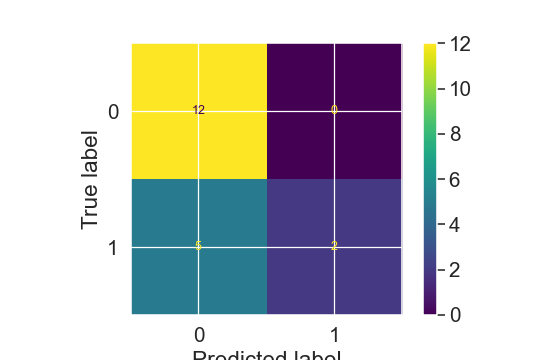

acccuracy score is : 0.7368421052631579
Precision: 1.0
Recall: 0.2857142857142857
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83        12
         1.0       1.00      0.29      0.44         7

    accuracy                           0.74        19
   macro avg       0.85      0.64      0.64        19
weighted avg       0.81      0.74      0.69        19

cross validation score for svc:  0.76


In [135]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
#Create a svm Classifier
SVM = svm.SVC(kernel='rbf',C=2, gamma='auto',random_state=9, probability=True) 
#Train the model using the training sets
SVM.fit(X_train, y_train)
y_pred_svc = SVM.predict(X_test)
cm_svc = metrics.confusion_matrix(y_test, y_pred_svc)
cm_display_svc = ConfusionMatrixDisplay(cm_svc).plot()
print("acccuracy score is :", accuracy_score(y_test,y_pred_svc))
print("Precision:",metrics.precision_score(y_test, y_pred_svc))
print("Recall:",metrics.recall_score(y_test, y_pred_svc))
print(metrics.classification_report(y_test, y_pred_svc))
scores_svc  =  cross_val_score(SVM,  X_train,  y_train,  cv=10)
print  ('cross validation score for svc: ',scores_svc.mean())

<IPython.core.display.Javascript object>


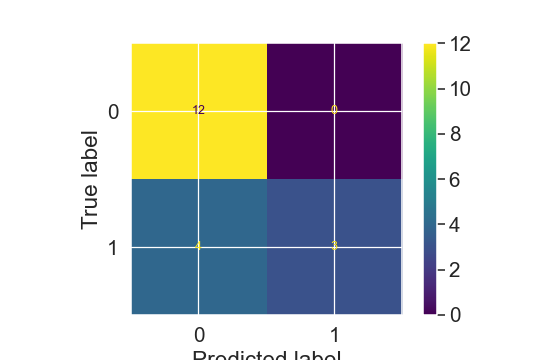

accuracy_score:  0.7894736842105263
precision_score:  1.0
recall_score:  0.42857142857142855
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        12
         1.0       1.00      0.43      0.60         7

    accuracy                           0.79        19
   macro avg       0.88      0.71      0.73        19
weighted avg       0.84      0.79      0.76        19

cross validation score for GNB:  0.8400000000000001


In [136]:
#GNB
# Gaussian naive bayesian classification model is selected for comparison
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb=gnb.predict(X_test)


##confusion matrix
cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)
cm_display_nb = ConfusionMatrixDisplay(cm_nb).plot()

print  ("accuracy_score: ", metrics.accuracy_score(y_test,y_pred_nb))
print  ("precision_score: ", metrics.precision_score(y_test,y_pred_nb))
print  ("recall_score: ",metrics.recall_score(y_test,y_pred_nb))
print(metrics.classification_report(y_test, y_pred_nb))

scores_nb =  cross_val_score(gnb,  X_train,  y_train,  cv=10)
print  ('cross validation score for GNB: ',scores_nb.mean())

<IPython.core.display.Javascript object>


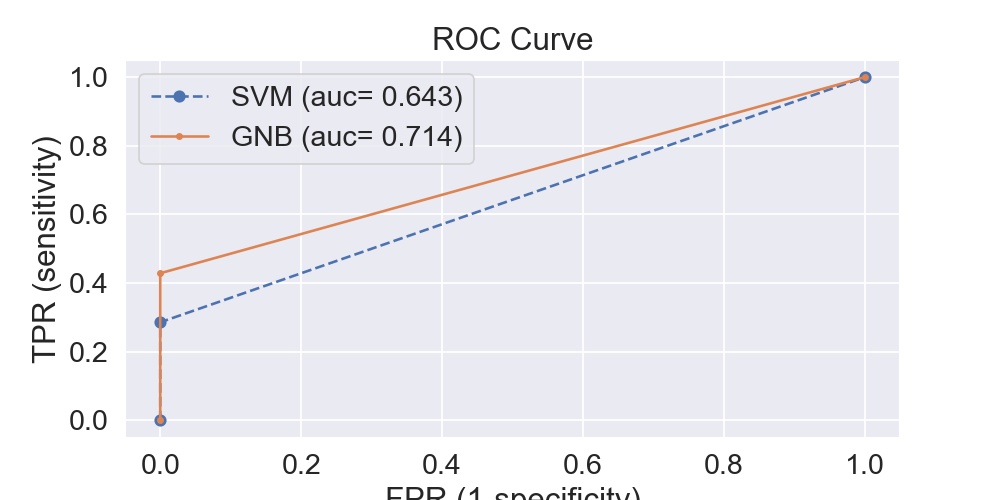

Text(0, 0.5, 'TPR (sensitivity)')

In [137]:
#false postive rate,true positive rate and threshold for SVC
fpr_svc,tpr_svc,thresh_svc = metrics.roc_curve(y_test, y_pred_svc)
#Area under the curve for SVC
auc_svc = metrics.auc(fpr_svc, tpr_svc)
#false postive rate,true positive rate and threshold for GNB
fpr_nb,tpr_nb,thresh_nb = metrics.roc_curve(y_test, y_pred_nb)

#Area under the curve for GNB
auc_nb = metrics.auc(fpr_nb, tpr_nb)
fig, ax =plt.subplots(figsize = (8,4),dpi=100)
ax.plot(fpr_svc, tpr_svc, 'o--',label='SVM (auc= %0.3f)'% auc_svc)
ax.plot(fpr_nb, tpr_nb, marker='.',label='GNB (auc= %0.3f)'% auc_nb)
ax.legend()
ax.set_title("ROC Curve")
ax.set_xlabel("FPR (1-specificity)")
ax.set_ylabel("TPR (sensitivity)")

In [138]:
## Clearly Gaussian naive bayesian model performs better than Suppor vector machine. 
## The confusion matrix shows the FN value lower for GNB model. This will help our task of not missing any valid patients. 
## A misdiagnosis can be catastrophic in this case rather than a wrong diagnosis
## I dropped the rows with missing values because imputation would not simply give a valid genetic array value. 
## outlier values are replaced with thr correspnding bounds in order to retain gene indice values

## Split had to be done partially inorder to do feature selection. The train_test_split was done at this stage as per the task in 
## step one of the question. Selected top 500 features among the 7129 features. This was done inorder to retain importance
## upto 4 decimal places.

Part 3 Unsupervised Learning

1) Pre-processing

a. The first column of the data is the label information,and you shall exclude them in clustering.
b. You shall pre-process the data,such as inspecting the data, visualising the data distribution, removing noise, and normalising the data.

In [139]:


import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

def ConvertTodf(data):
    data_df=pd.DataFrame(data)
    return data_df
def DrawBoxplot(df):
    sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.5)
    sns.boxplot(data= pd.DataFrame(df))
    return plt.show()
##Read Gene data 
Patient_Gene_df=pd.read_csv("cw2/CW2_dataset.csv")
Patient_Gene_df
##Read Cancer data 
Patient_Cancer_df=pd.read_csv('cw2/CW2_dataset_PatientID_labels.csv')
#Endcode AML aand ALL
from sklearn.preprocessing import LabelEncoder
encdr=LabelEncoder()
Patient_Cancer_df['cancer']=encdr.fit_transform(Patient_Cancer_df['cancer'])
y=Patient_Cancer_df['cancer']
##Remove Gene number and name columns 
Patient_Gene_col_dropped=Patient_Gene_df.drop(['Gene Accession Number','Gene Description'],axis=1) 
Patient_Gene_df_T=Patient_Gene_col_dropped
##Remove missing values, Imputation will not provide valid gene indices, so i feel it is better to just drop them
Patient_Gene_col_dropped=Patient_Gene_col_dropped.dropna(axis=0,how='any')
Patient_Gene_col_dropped.isnull().sum().sort_values(ascending=False)

merged_df=Patient_Gene_col_dropped
merged_df


,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
0,-214.0,-139,-76,-135.0,-106,-138.0,-72,-413,5,-88,...,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
1,-153.0,-73,-49,-114.0,-125,-85.0,-144,-260,-127,-105,...,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
2,-58.0,-1,-307,265.0,-76,215.0,238,7,106,42,...,-46,-124,-5,63,-153,49,-30,12,23,-50
3,88.0,283,309,12.0,168,71.0,55,-2,268,219,...,146,431,141,95,237,180,68,129,146,211
4,-295.0,-264,-376,-419.0,-230,-272.0,-399,-541,-210,-178,...,-172,-496,-256,-191,-215,-257,-110,-108,-171,-206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,793.0,782,1138,627.0,250,645.0,1140,1799,758,570,...,809,466,707,423,441,524,742,320,348,874
7125,329.0,295,777,170.0,314,341.0,482,446,385,359,...,445,349,354,41,99,249,234,174,208,393
7126,36.0,11,41,-50.0,14,26.0,10,59,115,9,...,-2,0,-22,0,-8,40,72,-4,0,34
7127,191.0,76,228,126.0,56,193.0,369,781,244,171,...,210,284,260,1777,80,-68,109,176,74,237


Correlation heatmap of distribution

<IPython.core.display.Javascript object>


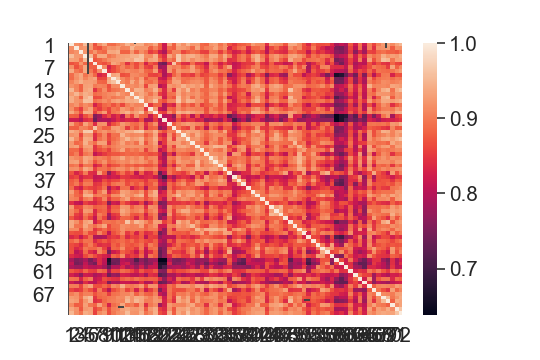

<AxesSubplot:>

In [140]:
sns.heatmap(merged_df.corr())

Box plot - Outliers clealy visible

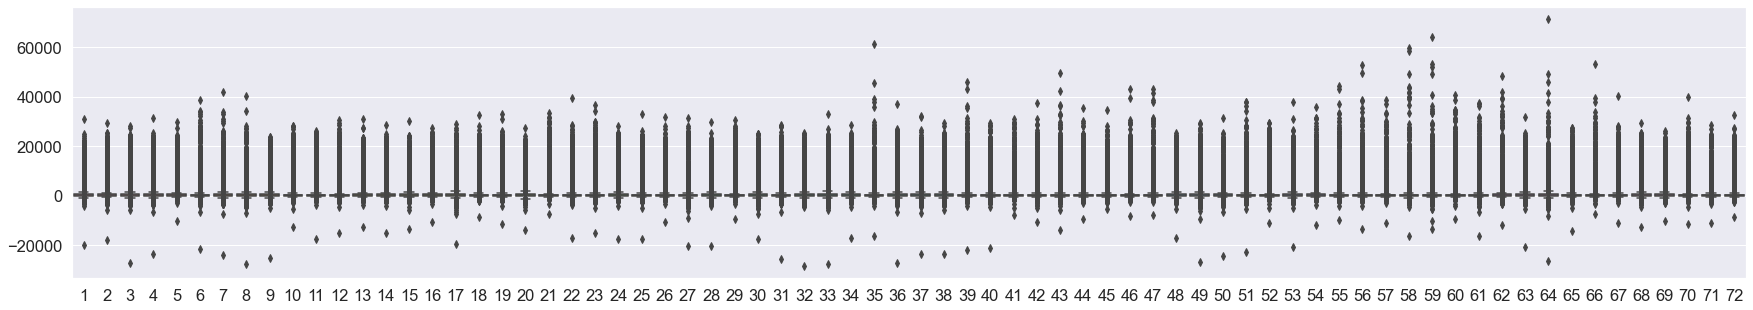

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(30,5)}, font_scale=1.5)
sns.boxplot(data= pd.DataFrame(merged_df))
plt.show()

Min-Max scaling performed 

In [148]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
merged_df_scaled=pd.DataFrame(scaler.fit_transform( merged_df))
merged_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.385214,0.376784,0.490713,0.424123,0.256582,0.357921,0.363267,0.401523,0.516187,0.306220,...,0.393779,0.268471,0.340169,0.124412,0.217509,0.295291,0.280590,0.223512,0.275291,0.207663
1,0.386412,0.378182,0.491202,0.424505,0.256106,0.358802,0.362175,0.403785,0.513481,0.305800,...,0.392747,0.263523,0.336907,0.121798,0.217080,0.295721,0.279517,0.223726,0.273891,0.207785
2,0.388278,0.379707,0.486531,0.431416,0.257334,0.363792,0.367968,0.407733,0.518258,0.309427,...,0.395975,0.267692,0.341537,0.126401,0.216008,0.300136,0.281938,0.224816,0.277379,0.209638
3,0.391146,0.385722,0.497683,0.426803,0.263452,0.361397,0.365193,0.407600,0.521580,0.313794,...,0.399641,0.273377,0.345038,0.126928,0.223611,0.303262,0.284634,0.227094,0.280510,0.216003
4,0.383623,0.374137,0.485282,0.418944,0.253473,0.355692,0.358307,0.399630,0.511779,0.303999,...,0.393568,0.263882,0.335516,0.122226,0.214800,0.292833,0.279737,0.222480,0.272440,0.205834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,0.404993,0.396290,0.512691,0.438016,0.265508,0.370944,0.381649,0.434228,0.531626,0.322453,...,0.412302,0.273736,0.358615,0.132320,0.227587,0.311472,0.303175,0.230813,0.285652,0.232172
7114,0.395879,0.385976,0.506155,0.429684,0.267113,0.365888,0.371669,0.414223,0.523978,0.317248,...,0.405351,0.272537,0.350148,0.126040,0.220920,0.304909,0.289200,0.227970,0.282088,0.220442
7115,0.390124,0.379961,0.492831,0.425672,0.259591,0.360649,0.364511,0.408502,0.518443,0.308613,...,0.396815,0.268962,0.341129,0.125366,0.218835,0.299921,0.284744,0.224504,0.276793,0.211687
7116,0.393169,0.381338,0.496216,0.428881,0.260644,0.363426,0.369955,0.419176,0.521087,0.312609,...,0.400863,0.271872,0.347893,0.154578,0.220550,0.297344,0.285761,0.228009,0.278677,0.216637


Capping the outliers

In [149]:

cols=merged_df_scaled.columns
def OutlierCapper(df,col):
    for col in cols:
        P25=(df[col].quantile(0.25))
        P75=(df[col].quantile(0.75))
        IQR=P75-P25
        Upperlimit=P75+1.5*IQR
        Lowerlimit=P25-1.5*IQR
        ##Capped outlier values at upper and lower limit instead of removing rows to retain other gene indices of same row        
        df[col]=np.where(df[col]>Upperlimit,Upperlimit,np.where(df[col]<Lowerlimit,Lowerlimit,df[col]))
OutlierCapper(merged_df_scaled,cols)
merged_df_cleaned=merged_df_scaled

outlier capped distribution plotted

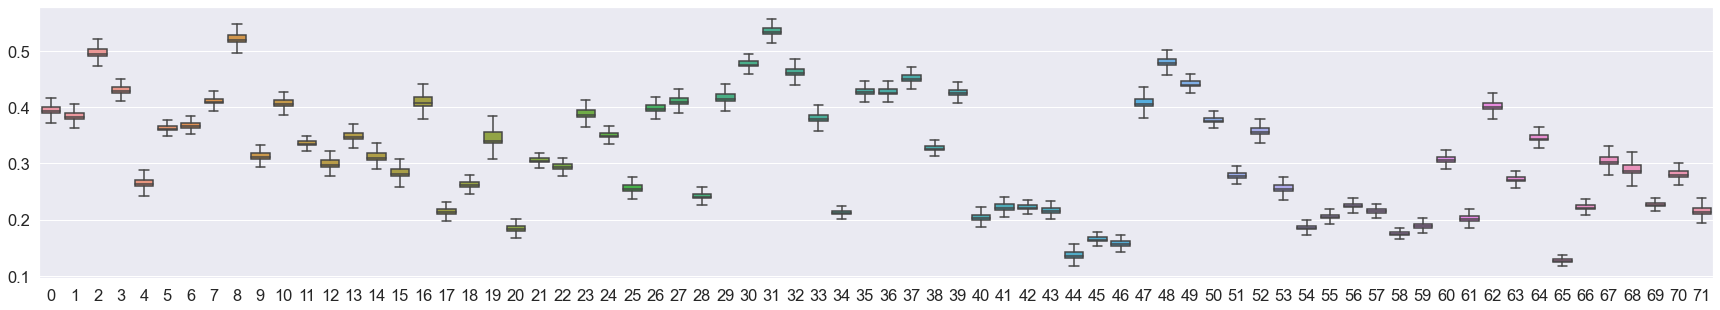

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(30,5)}, font_scale=1.5)
sns.boxplot(data= pd.DataFrame(merged_df_cleaned))
plt.show()

K-means clustering

Apply the K-means clustering algorithm to analyse the data. You shall (1) tune the parameter setting, select the optimal cluster number, and (2) visualise the centroids and the clustering results.

Inertia for clusters : 1 is 43.27658354141262
Inertia for clusters : 2 is 18.756080678230624
Inertia for clusters : 3 is 13.837614684788399
Inertia for clusters : 4 is 11.156511246563245
Inertia for clusters : 5 is 9.947341128041547
Inertia for clusters : 6 is 9.341156804160814
Inertia for clusters : 7 is 8.929910851053036
Inertia for clusters : 8 is 8.61742043263785
Inertia for clusters : 9 is 8.374492569415748
Inertia for clusters : 10 is 8.168016424223955


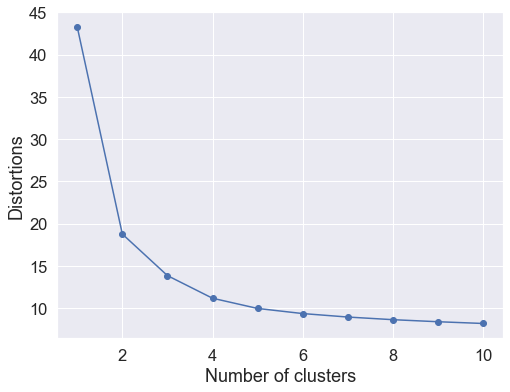

In [151]:
from  sklearn.cluster  import  KMeans
distortions  =  []
X=merged_df_cleaned.iloc[:,:].values
for  i  in  range(1,  11):
    km=  KMeans(n_clusters=i,  random_state=10,init='k-means++')
    cluster_labels=km.fit(X)
    print("Inertia for clusters :",i, "is", km.inertia_)
    distortions.append(km.inertia_)## appending sum of squared erros(interia) to array
plt.figure(figsize=(8,6))
plt.plot(range(1,11),  distortions,  marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.show()
## 2 clusters seem to have the most drop in inertia 

The clusters are  [1 1 1 ... 1 1 1]
The inertia is  18.756080678230624
The predicted clusters are  [0 0 0 ... 0 0 0]


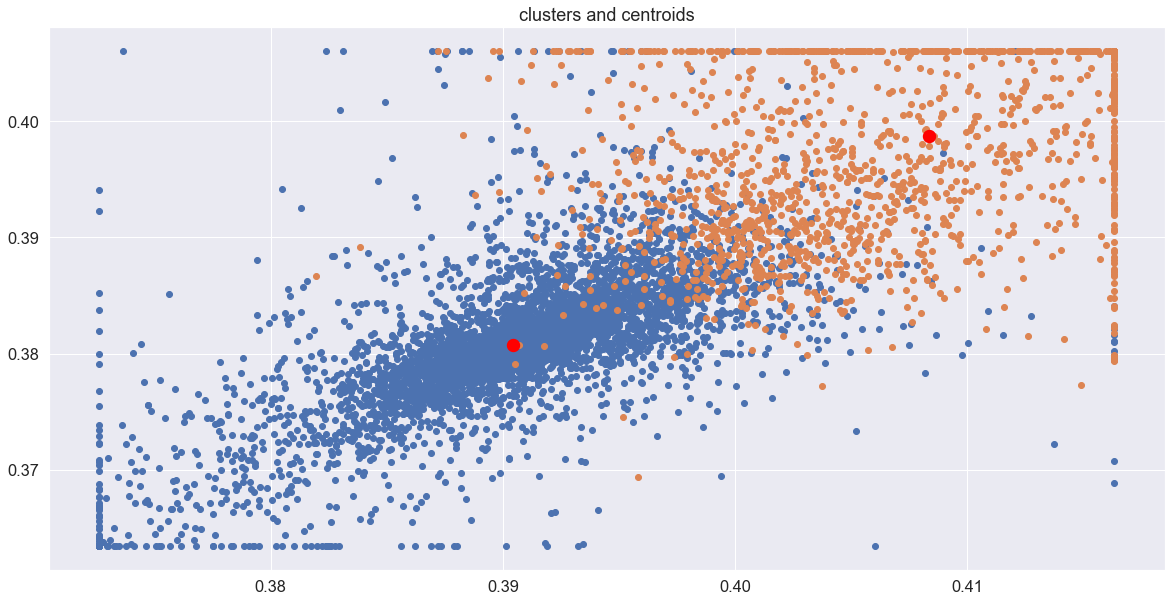

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
from  sklearn.cluster  import  KMeans
X = merged_df_cleaned.iloc[:,:].values
kmeans=KMeans(n_clusters=2,  random_state=10,init='k-means++').fit(X)
label = kmeans.fit_predict(X)
u_labels = np.unique(label)
print("The clusters are ", kmeans.labels_)
#Inertia provides a value for the coherence of the clusters. The lower the better
print("The inertia is ", kmeans.inertia_)
prediction_kmeans = kmeans.fit_predict(X,y)
print("The predicted clusters are ", prediction_kmeans)

centroids=kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
fig, ax =plt.subplots(figsize = (20,10))
#predicted clusters combination for each rows of data(X)
for i in u_labels:
    plt.scatter(X[prediction_kmeans == i , 0] , X[prediction_kmeans == i , 1] , label = i)
plt.scatter(centroids_x,centroids_y,marker = "o",linewidths = 5, zorder = 10,s=70, c='red')
plt.title("clusters and centroids")
plt.show()



Apply PCA technique to reduce dimension

Explained Variance:  0.8449448495482198


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
PC1,-0.134610,-0.133400,-0.143134,-0.120736,-0.139029,-0.087599,-0.098990,-0.105092,-0.157780,-0.122278,...,-0.140710,-0.086520,-0.115328,-0.057474,-0.088926,-0.155432,-0.180564,-0.074185,-0.118545,-0.134530
PC2,-0.009152,-0.019366,-0.069477,-0.022779,0.172031,-0.052806,-0.054204,-0.089853,0.024522,-0.031045,...,-0.132311,-0.104332,-0.120889,0.026084,0.004047,0.224602,0.245877,-0.000672,0.013614,0.045572


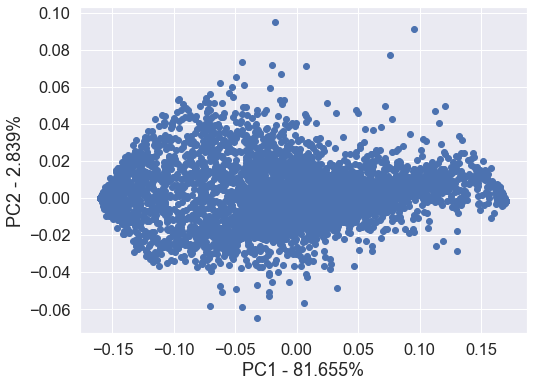

In [153]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
principal_components = model.fit_transform(X)
variance_ratio = np.round(model.explained_variance_ratio_* 100, decimals=3)
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('PC1 - {0}%'.format(variance_ratio[0]))
plt.ylabel('PC2 - {0}%'.format(variance_ratio[1]))
df_pca = pd.DataFrame(model.components_,index=['PC1','PC2'],columns=merged_df_cleaned.columns)
print ("Explained Variance: ",np.sum(model.explained_variance_ratio_))
df_pca

After redcuing dimensions using PCA

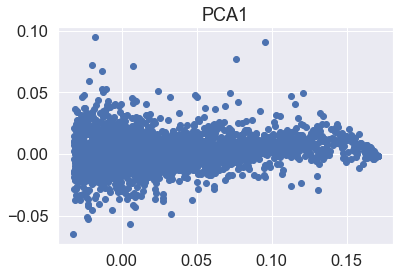

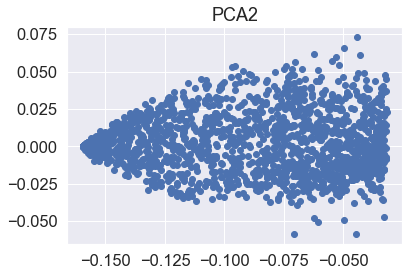

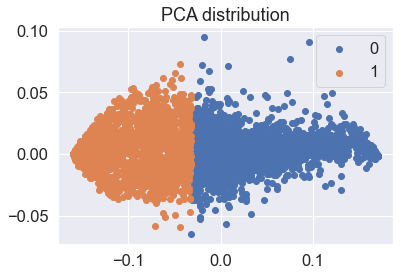

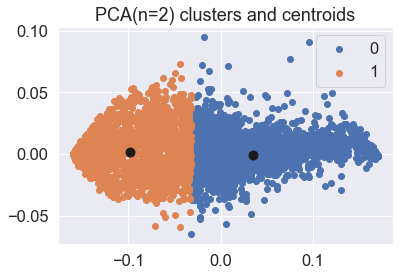

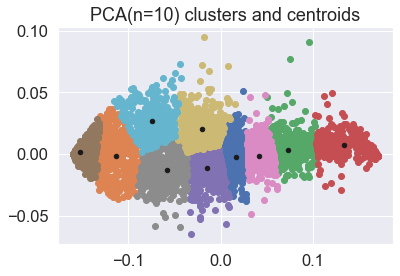

In [154]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#pass the principal component as data
# df = principal_components
X=principal_components

#Initialize kmeans with 2 clusters as recommended by the elbow method
kmeans = KMeans(n_clusters=2,  random_state=10,init='k-means++')
#cluster labels are predicted
label = kmeans.fit_predict(X)
#data belonging to first label data 0
data_cluster0 = X[label == 0]
#plot 2 pca columns under cluster 0
plt.title("PCA1")
plt.scatter(data_cluster0[:,0] , data_cluster0[:,1])
plt.show()
#filter rows of original data
data_cluster1 = X[label == 1]
#Plotting the results
plt.title("PCA2")
plt.scatter(data_cluster1[:,0] , data_cluster1[:,1] )
plt.show()
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
# plt.xlabel("Number of clusters")
# plt.ylabel("Distortions")
plt.title("PCA distribution")
plt.legend()
plt.show()
#Getting the Centroids
centroids = kmeans.cluster_centers_
# centroids = pca.fit_transform(centroids)
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title("PCA(n=2) clusters and centroids")
plt.legend()
plt.show()
 
kmeans = KMeans(n_clusters= 10)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
#Getting unique labels
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
# centroids = pca.fit_transform(centroids)
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')
plt.title("PCA(n=10) clusters and centroids")
# plt.legend()
plt.show()

hierarchical clustering 

apply the clustering algorithm to analyse the data. You shall (1) plot a hierarchical clustering dendrogram, (2) Compare characteristics of different linkage methods for the hierarchical clustering
results, and (3) estimate the correct number of clusters using clustering validity indices, also display the results.

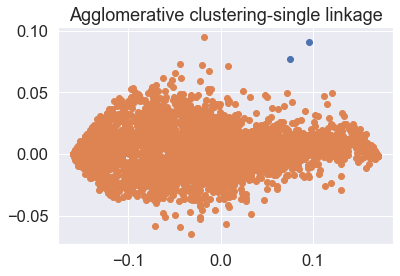

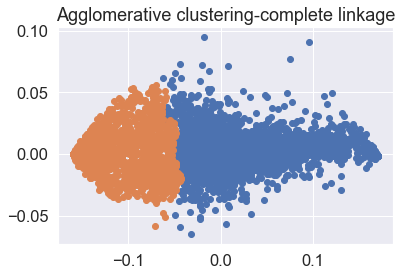

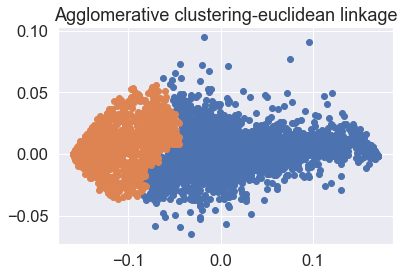

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
from  sklearn.cluster  import  KMeans
from sklearn.cluster import AgglomerativeClustering
# X = merged_df_cleaned.iloc[:,:].values
X=principal_components
# kmeans=KMeans(n_clusters=2,  random_state=10,init='k-means++').fit(X)
##minimum distance between clusters(distance between nearest points in clusters)
Hcluster_single = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
##maximum distance between clusters(distance between farthest points in clusters)
Hcluster_complete = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
##average distance between clusters
Hcluster_average = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

Hcluster_single_labels  =  Hcluster_single.fit_predict(X)
Hcluster_complete_labels  =  Hcluster_complete.fit_predict(X)
Hcluster_average_labels  =  Hcluster_average.fit_predict(X)

u_labels_single = np.unique(Hcluster_single_labels)
u_labels_complete = np.unique(Hcluster_complete_labels)
u_labels_average = np.unique(Hcluster_average_labels)

for i in u_labels_single:
    plt.scatter(X[Hcluster_single_labels == i , 0] , X[Hcluster_single_labels == i , 1] , label = i,cmap="rainbow")
plt.title("Agglomerative clustering-single linkage")
plt.show()
for i in u_labels_complete:
    plt.scatter(X[Hcluster_complete_labels == i , 0] , X[Hcluster_complete_labels == i , 1] , label = i,cmap="rainbow")
plt.title("Agglomerative clustering-complete linkage")
plt.show()
for i in u_labels_average:
    plt.scatter(X[Hcluster_average_labels == i , 0] , X[Hcluster_average_labels == i , 1] , label = i,cmap="rainbow")
plt.title("Agglomerative clustering-euclidean linkage")
plt.show()




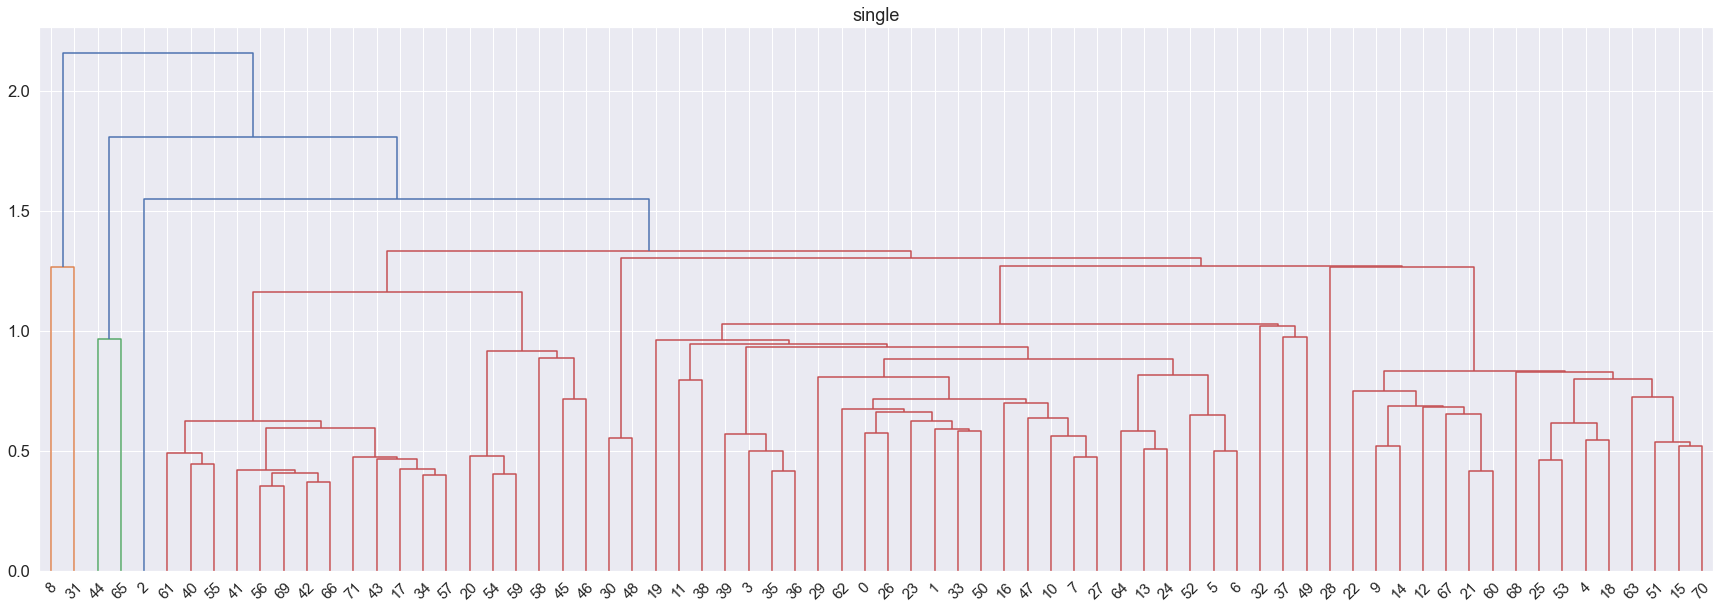

<Figure size 432x288 with 0 Axes>

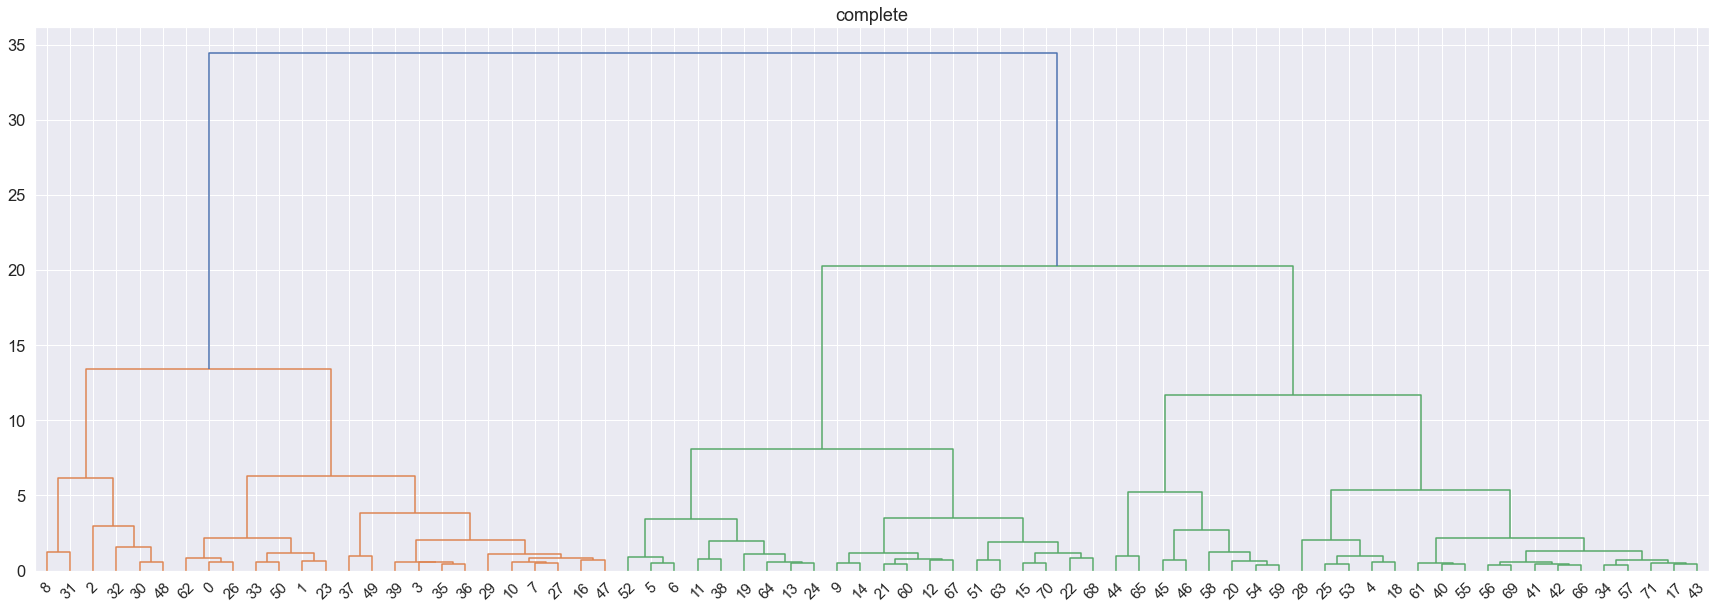

<Figure size 432x288 with 0 Axes>

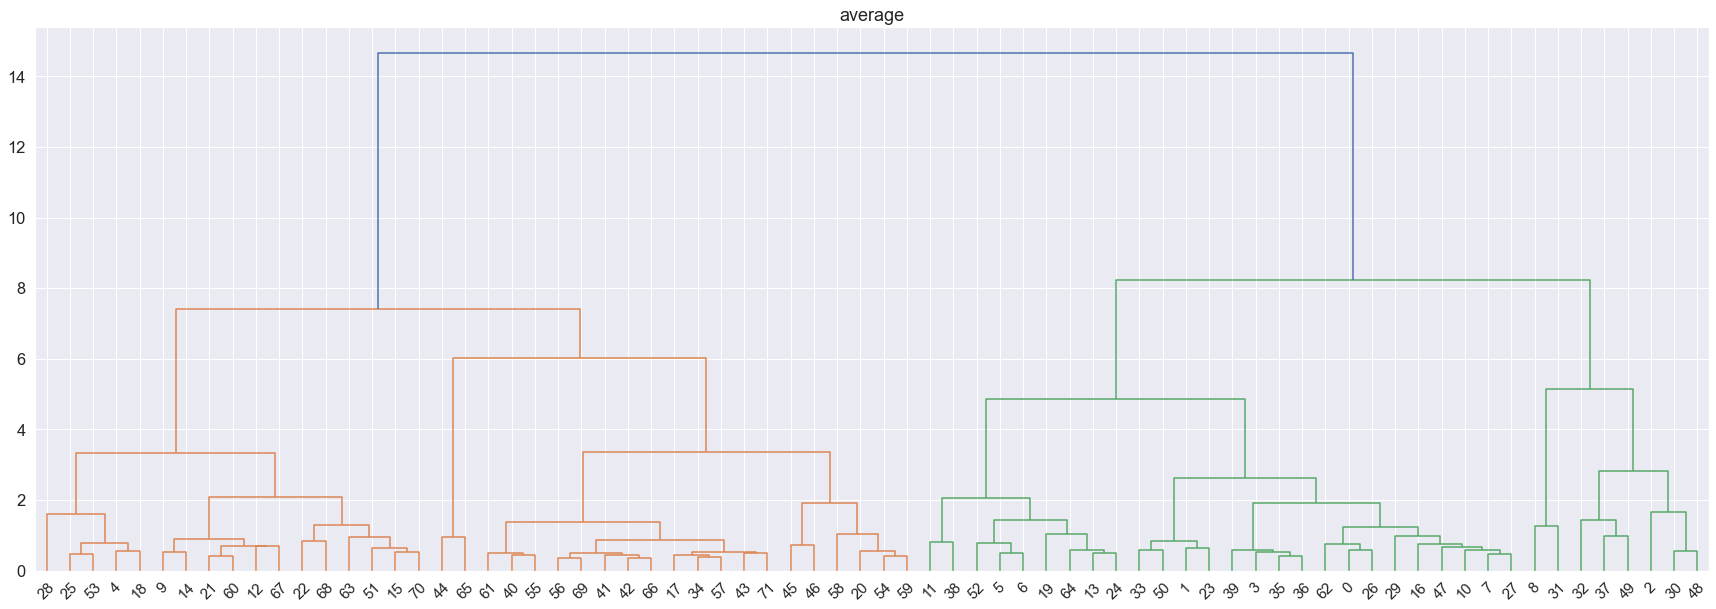

<Figure size 432x288 with 0 Axes>

In [114]:

%matplotlib inline
from scipy.cluster import hierarchy as hc
import matplotlib.pyplot as plt
dataframe = merged_df_cleaned
method=['single','complete','average']
for i in range(len(method)):
    z = hc.linkage(dataframe.values.T,method[i], metric='euclidean')#There are also differen distance metrics that can be used
    fig, ax =plt.subplots(figsize = (30,10))
    dendrogram = hc.dendrogram(z,labels=dataframe.columns,p=12,leaf_rotation=45.,leaf_font_size=15.,show_contracted=True)
    plt.title(method[i])
    plt.figure()    
    plt.show()
# 2 clusters are selected by cutting longest uncut vertical line
#  number of vertical lines cut from the half of that line is the number of k
#Xaxis is distance value upwards
# yaxis is number of clusters downwards


Evaluating different linkage methods

In [115]:

## Build clustering model
from sklearn.cluster import AgglomerativeClustering
from  sklearn.metrics  import  silhouette_samples,  silhouette_score
from  sklearn.metrics  import  davies_bouldin_score
from  sklearn.metrics  import  calinski_harabasz_score
n_clusters=2
## good for clearly seperatble clusters since this uses shortest distance between clusters
cluster_single = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
## good for data with good amounts of outliers. efficient in making more clusters
cluster_complete = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster_average = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster_ward = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# y_pred=cluster.fit_predict(X)
Hcluster1_labels_single  =  cluster_single.fit_predict(X)
print("Linkage=Single")
silhouette_avg  =  silhouette_score(X,  Hcluster1_labels_single)
print("For n_clusters =",  n_clusters, "The average silhouette_score is :",  silhouette_avg)
davies_bouldin_avg  =  davies_bouldin_score(X,  Hcluster1_labels_single)
print("For n_clusters =",  n_clusters, "The average davies_bouldin_score is :",  davies_bouldin_avg)
calinski_harabasz_avg  =  calinski_harabasz_score(X,  Hcluster1_labels_single)
print("For n_clusters =",  n_clusters, "The average calinski_harabasz_score is :",  calinski_harabasz_avg)
print("---------")

print("Linkage=Complete")     
Hcluster1_labels_complete  =  cluster_complete.fit_predict(X)
silhouette_avg  =  silhouette_score(X,  Hcluster1_labels_complete)
print("For n_clusters =",  n_clusters, "The average silhouette_score is :",  silhouette_avg)
davies_bouldin_avg  =  davies_bouldin_score(X,  Hcluster1_labels_complete)
print("For n_clusters =",  n_clusters, "The average davies_bouldin_score is :",  davies_bouldin_avg)
calinski_harabasz_avg  =  calinski_harabasz_score(X,  Hcluster1_labels_complete)
print("For n_clusters =",  n_clusters, "The average calinski_harabasz_score is :",  calinski_harabasz_avg)
print("---------")

print("Linkage=Average")     
Hcluster1_labels_average  =  cluster_average.fit_predict(X)
silhouette_avg  =  silhouette_score(X,  Hcluster1_labels_average)
print("For n_clusters =",  n_clusters, "The average silhouette_score is :",  silhouette_avg)
davies_bouldin_avg  =  davies_bouldin_score(X,  Hcluster1_labels_average)
print("For n_clusters =",  n_clusters, "The average davies_bouldin_score is :",  davies_bouldin_avg)
calinski_harabasz_avg  =  calinski_harabasz_score(X,  Hcluster1_labels_average)
print("For n_clusters =",  n_clusters, "The average calinski_harabasz_score is :",  calinski_harabasz_avg)
print("---------")

print("Linkage=Ward")     
Hcluster1_labels_ward  =  cluster_ward.fit_predict(X)
silhouette_avg  =  silhouette_score(X,  Hcluster1_labels_ward)
print("For n_clusters =",  n_clusters, "The average silhouette_score is :",  silhouette_avg)
davies_bouldin_avg  =  davies_bouldin_score(X,  Hcluster1_labels_ward)
print("For n_clusters =",  n_clusters, "The average davies_bouldin_score is :",  davies_bouldin_avg)
calinski_harabasz_avg  =  calinski_harabasz_score(X,  Hcluster1_labels_ward)
print("For n_clusters =",  n_clusters, "The average calinski_harabasz_score is :",  calinski_harabasz_avg)
print("---------")


Linkage=Single
For n_clusters = 2 The average silhouette_score is : 0.36482719183852313
For n_clusters = 2 The average davies_bouldin_score is : 0.5787721933617538
For n_clusters = 2 The average calinski_harabasz_score is : 5.628960893640187
---------
Linkage=Complete
For n_clusters = 2 The average silhouette_score is : 0.6341977651216606
For n_clusters = 2 The average davies_bouldin_score is : 0.5044587727972931
For n_clusters = 2 The average calinski_harabasz_score is : 13774.704511236998
---------
Linkage=Average
For n_clusters = 2 The average silhouette_score is : 0.626223545939594
For n_clusters = 2 The average davies_bouldin_score is : 0.47754333254862347
For n_clusters = 2 The average calinski_harabasz_score is : 11983.459799366572
---------
Linkage=Ward
For n_clusters = 2 The average silhouette_score is : 0.628121979015336
For n_clusters = 2 The average davies_bouldin_score is : 0.4440021932213277
For n_clusters = 2 The average calinski_harabasz_score is : 11275.253625672338
--

Estimating correct number of clusters using validity indices

In [116]:
from  sklearn.metrics  import  silhouette_samples,  silhouette_score
from  sklearn.metrics  import  davies_bouldin_score
from  sklearn.metrics  import  calinski_harabasz_score
## Build clustering model
from sklearn.cluster import AgglomerativeClustering
n_clusters=10
for  n_clusters  in  range(2,11):
        clusterer  = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='single')
        AgglomerativeCluster_labels  =  clusterer.fit_predict(X)
#         Hcluster1_labels_single  =  cluster_single.fit_predict(X)
        #closer to one is good
        silhouette_avg  =  silhouette_score(X,  AgglomerativeCluster_labels)
        print("For n_clusters =",  n_clusters, "The average silhouette_score is :",  silhouette_avg)
        ##lower the better
        davies_bouldin_avg  =  davies_bouldin_score(X,  AgglomerativeCluster_labels)
        print("For n_clusters =",  n_clusters, "The average davies_bouldin_score is :",  davies_bouldin_avg)
        ##Higher the better
        calinski_harabasz_avg  =  calinski_harabasz_score(X,  AgglomerativeCluster_labels)
        print("For n_clusters =",  n_clusters, "The average calinski_harabasz_score is :",  calinski_harabasz_avg)
        print("---------")
        
## n_clusters=2 is the right selection as per all the validity indices

For n_clusters = 2 The average silhouette_score is : 0.36482719183852313
For n_clusters = 2 The average davies_bouldin_score is : 0.5787721933617538
For n_clusters = 2 The average calinski_harabasz_score is : 5.628960893640187
---------
For n_clusters = 3 The average silhouette_score is : 0.306438274606659
For n_clusters = 3 The average davies_bouldin_score is : 0.49905760357616935
For n_clusters = 3 The average calinski_harabasz_score is : 2.8423956279915625
---------
For n_clusters = 4 The average silhouette_score is : 0.20542048282283673
For n_clusters = 4 The average davies_bouldin_score is : 0.5390382990599685
For n_clusters = 4 The average calinski_harabasz_score is : 2.5018831462632924
---------
For n_clusters = 5 The average silhouette_score is : 0.12508644488366055
For n_clusters = 5 The average davies_bouldin_score is : 0.6330311432104219
For n_clusters = 5 The average calinski_harabasz_score is : 2.1268016447219003
---------
For n_clusters = 6 The average silhouette_score is

In [117]:
## K means clustering works with making clusters and thier centroids. One has to assume the number of clustes starting out. Where 
## in hierarchical clustering the strategy groups the similar clusters and the details at any number of clusters is
## readily available. K means is faster than hierarchical clustering,hence it is suited for large amounts of data. 